###  H.W

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
df=pd.read_csv('./AB_NYC_2019.csv')

In [7]:
columns=df.dtypes[df.dtypes=='object'].index

##  data cleaning

In [8]:
for col in columns:
    df[col]=df[col].str.lower().str.replace(' ','_')

In [9]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,clean_&_quiet_apt_home_by_the_park,2787,john,brooklyn,kensington,40.64749,-73.97237,private_room,149,1,9,2018-10-19,0.21,6,365
1,2595,skylit_midtown_castle,2845,jennifer,manhattan,midtown,40.75362,-73.98377,entire_home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,the_village_of_harlem....new_york_!,4632,elisabeth,manhattan,harlem,40.80902,-73.94190,private_room,150,3,0,NaN,NaN,1,365
3,3831,cozy_entire_floor_of_brownstone,4869,lisaroxanne,brooklyn,clinton_hill,40.68514,-73.95976,entire_home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,entire_apt:_spacious_studio/loft_by_central_park,7192,laura,manhattan,east_harlem,40.79851,-73.94399,entire_home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,charming_one_bedroom_-_newly_renovated_rowhouse,8232441,sabrina,brooklyn,bedford-stuyvesant,40.67853,-73.94995,private_room,70,2,0,NaN,NaN,2,9
48891,36485057,affordable_room_in_bushwick/east_williamsburg,6570630,marisol,brooklyn,bushwick,40.70184,-73.93317,private_room,40,4,0,NaN,NaN,2,36
48892,36485431,sunny_studio_at_historical_neighborhood,23492952,ilgar_&_aysel,manhattan,harlem,40.81475,-73.94867,entire_home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd_st._time_square-cozy_single_bed,30985759,taz,manhattan,hell's_kitchen,40.75751,-73.99112,shared_room,55,1,0,NaN,NaN,6,2


In [129]:
np.random.seed(42)
n=len(df)
n

48895

In [130]:
n_val=int(n*0.2)
n_test=int(n*0.2)
n_train=n-n_val-n_test


In [131]:
idx=np.arange(n)
np.random.shuffle(idx)
idx
df_shuffled=df.iloc[idx]
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()


y_train_orig = df_train.price.values
y_val_orig = df_val.price.values
y_test_orig = df_test.price.values

y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

del df_train['price']
del df_val['price']
del df_test['price']


#  EDA

###  it has long tail ,so we take log of it to avoid it.
for safer side we all add 1 in log 

<AxesSubplot:xlabel='price', ylabel='Count'>

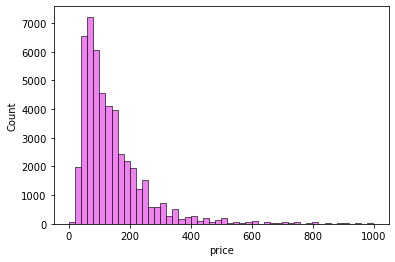

In [132]:
sns.histplot(df[df.price<1000].price,bins=50,color='violet',alpha=1)

<AxesSubplot:xlabel='price', ylabel='Count'>

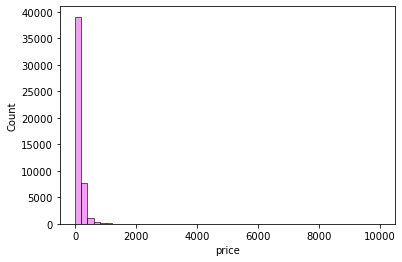

In [133]:
sns.histplot(df.price,bins=50,color='violet')

In [134]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

##  Linear regression

In [135]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

###  baseline

In [136]:
base=['latitude',
'longitude',

'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']

In [137]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [138]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [139]:
y_pred = w_0 + X_train.dot(w)

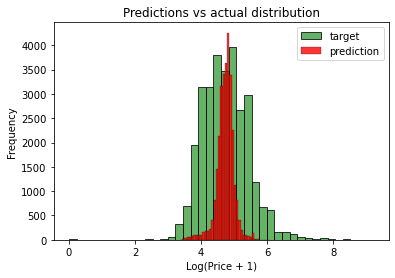

In [140]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='green', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='red', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

##  ANS->3

In [171]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)


In [172]:
rmse(y_train, y_pred).round(2)

0.69

In [173]:
def prepare_X_mean(df):
    df_num = df[base]
    df_num = df_num.fillna(value=df.reviews_per_month.mean())
    X = df_num.values
    return X

In [174]:
X_train = prepare_X_mean(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

In [175]:

rmse(y_train, y_pred).round(2)

0.65

  ### ANS 4

In [168]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [169]:
X_train = prepare_X_mean(df_train)
# w_0, w = train_linear_regression(X_train, y_train)


In [170]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_train.dot(w)
    print('%s, %.2f,    %.2f' % (r, w_0,   rmse(y_train,y_pred)))

0, -430.20,    0.65
1e-06, -430.15,    0.65
0.0001, -425.10,    0.65
0.001, -384.11,    0.65
0.01, -195.56,    0.66
0.1, -33.09,    0.68
1, -3.55,    0.68
5, -0.71,    0.69
10, -0.36,    0.69


### ans 5

In [158]:
li=[]
for i in range(10):
    
    np.random.seed(i)
    
    n_val=int(n*0.2)
    n_test=int(n*0.2)
    n_train=n-n_val-n_test

    idx=np.arange(n)
    np.random.shuffle(idx)
    idx
    df_shuffled=df.iloc[idx]
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()


    y_train_orig = df_train.price.values
    y_val_orig = df_val.price.values
    y_test_orig = df_test.price.values

    y_train = np.log1p(df_train.price.values)
    y_val = np.log1p(df_val.price.values)
    y_test = np.log1p(df_test.price.values)

    del df_train['price']
    del df_val['price']
    del df_test['price']

    
    
    def train_linear_regression(X, y):
        ones = np.ones(X.shape[0])
        X = np.column_stack([ones, X])

        XTX = X.T.dot(X)
        XTX_inv = np.linalg.inv(XTX)
        w = XTX_inv.dot(X.T).dot(y)

        return w[0], w[1:]
    
    def prepare_X(df):
        df_num = df[base]
        df_num = df_num.fillna(0)
        X = df_num.values
        return X

    def rmse(y, y_pred):
        error = y_pred - y
        mse = (error ** 2).mean()
        return np.sqrt(mse)
   

    X_train = prepare_X_mean(df_train)
    w_0, w = train_linear_regression(X_train, y_train)
#     y_pred = w_0 + X_train.dot(w)
    
    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)
#      rmse(y_val, y_pred)


    li.append(rmse(y_val, y_pred))

In [159]:
li

[0.655232193722862,
 0.64688220372274,
 0.6478252669505371,
 0.6375832292864061,
 0.6450810069913536,
 0.6308717085055886,
 0.6299168310671004,
 0.6508571308146766,
 0.6489296512338881,
 0.6436363670429696]

In [160]:
np.std(li).round(3)

0.008

###  ans 6

In [167]:

    
    np.random.seed(9)
    
    n_val=int(n*0.2)
    n_test=int(n*0.2)
    n_train=n-n_val-n_test

    idx=np.arange(n)
    np.random.shuffle(idx)
    idx
    df_shuffled=df.iloc[idx]
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()


    y_train_orig = df_train.price.values
    y_val_orig = df_val.price.values
    y_test_orig = df_test.price.values

    y_train = np.log1p(df_train.price.values)
    y_val = np.log1p(df_val.price.values)
    y_test = np.log1p(df_test.price.values)

    del df_train['price']
    del df_val['price']
    del df_test['price']

    
    
    
    def prepare_X(df):
        df_num = df[base]
        df_num = df_num.fillna(0)
        X = df_num.values
        return X

    def rmse(y, y_pred):
        error = y_pred - y
        mse = (error ** 2).mean()
        return np.sqrt(mse)
    def train_linear_regression_reg(X,y,r=0.001):
        u=np.ones(X.shape[0])
        X=np.column_stack((u.T,X))

        XTX=(X.T).dot(X)
        XTX=XTX+r*np.eye(XTX.shape[0])

        XTX_inv=np.linalg.inv(XTX)
        w=XTX_inv.dot(X.T).dot(y)

        return w[0],w[1:]   


    df_full_train=pd.concat([df_train,df_val])
    df_full_train.reset_index(drop=True)
    
    x_full_train=prepare_X(df_full_train)
    
    y_full=np.concatenate([y_train,y_val])
    
    w,wfull=train_linear_regression_reg(x_full_train,y_full,r=0.001)
    
    X_full=prepare_X(df_full_train)
    y_pre= w+ X_full.dot(wfull)
    
    print(rmse(y_full,y_pre))
    X_test=prepare_X(df_test)
    y_pred= w+ X_test.dot(wfull)
    print(rmse(y_test,y_pred))


    

0.6453578556352733
0.6452771348684564


# ANS->1

In [124]:
df[base].isna().sum()

latitude                              0
longitude                             0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# ANS->2

In [125]:
n=len(df)
a=int(n*0.5)
idx=np.arange(a)
# np.random.shuffle(idx)
# idx
# df_shuffled=df.iloc[idx]
df_shuffledd=df.iloc[idx]


In [126]:
df_shuffledd.minimum_nights.median()

3.0